In [17]:
import os, sys
import dotenv

import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

sys.path.append(os.environ.get('PATH_OPENSKY'))
from user_eval import get_df_posts 
from news_outlet_eval import get_news_feed, get_posts_from_nos

dotenv.load_dotenv('.env')    
PATH_DATA = os.environ.get('PATH_OPENSKY') + os.environ.get('PATH_REL_DATA')
PATH_USER_POSTS = PATH_DATA + 'user_posts/'

PATH_RESULTS = os.environ.get('PATH_OPENSKY') + 'results/'
PATH_USER_REPLIES_NEWS = PATH_RESULTS + 'agg_user_replies_news_2.csv'
PATH_USER_REPLIES_NEWS_POSTS = PATH_RESULTS + 'agg_user_replies_news_posts_2.csv'

PATH_FEED_POSTS = PATH_DATA + 'feed_posts/'

COLOR_POSITIVE = os.environ.get('COLOR_POSITIVE')
COLOR_NEUTRAL = os.environ.get('COLOR_NEUTRAL')
COLOR_NEGATIVE = os.environ.get('COLOR_NEGATIVE')

df = pd.read_csv(PATH_USER_REPLIES_NEWS_POSTS)

/tmp/ipykernel_11479/1075057419.py:28: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH_USER_REPLIES_NEWS_POSTS)


In [18]:
df

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
0,10657080,284413,bsky.social,2024-01-14 08:03:00,let’s hope his expands ten fold 💪💪,['eng'],0,0,0,10657081.0,15717.0,10657081.0,15717.0,NaN,NaN,NaN,NaN,NaN,2.0,0.945
1,10657084,284413,bsky.social,2024-01-12 22:12:00,"yes, we can do this! 💪",['eng'],3,0,0,5595208.0,2486.0,5595208.0,2486.0,NaN,NaN,NaN,NaN,NaN,2.0,0.956
2,10657085,284413,bsky.social,2024-01-11 14:19:00,"in other words, “as long as it takes” it refer...",['eng'],0,1,0,10657086.0,12030.0,10657086.0,12030.0,NaN,NaN,NaN,NaN,NaN,1.0,0.583
3,10657096,284413,bsky.social,2024-01-08 14:10:00,i’ll believe it when i see the weapons in Ukra...,['eng'],0,0,0,10657097.0,15717.0,10657097.0,15717.0,NaN,NaN,NaN,NaN,NaN,1.0,0.509
4,10657117,284413,bsky.social,2024-01-05 09:22:00,Expect the world to become way way worse. If a...,['eng'],1,0,0,5271912.0,15717.0,5271912.0,15717.0,NaN,NaN,NaN,NaN,NaN,0.0,0.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36816,171050451,141248,bsky.social,2024-03-09 13:47:00,La preuve qu'ils sont antidémocratiques. \nPer...,"['eng', 'fra']",4,0,0,5550653.0,4890.0,5550653.0,4890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36817,105014318,92560,bsky.social,2024-03-08 01:59:00,What a complete abdication of good journalism ...,['eng'],0,0,0,698597.0,9.0,698597.0,9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.790
36818,105014322,92560,bsky.social,2024-03-07 22:16:00,Trump and Biden are at par with age...exactly ...,['eng'],4,0,0,127576.0,379.0,127576.0,379.0,NaN,NaN,NaN,NaN,NaN,0.0,0.867
36819,105014501,92560,bsky.social,2024-01-05 08:08:00,Because doctors are literally refusing to pres...,['eng'],1,0,0,145919.0,379.0,145919.0,379.0,NaN,NaN,NaN,NaN,NaN,0.0,0.882


In [19]:
df

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
0,10657080,284413,bsky.social,2024-01-14 08:03:00,let’s hope his expands ten fold 💪💪,['eng'],0,0,0,10657081.0,15717.0,10657081.0,15717.0,NaN,NaN,NaN,NaN,NaN,2.0,0.945
1,10657084,284413,bsky.social,2024-01-12 22:12:00,"yes, we can do this! 💪",['eng'],3,0,0,5595208.0,2486.0,5595208.0,2486.0,NaN,NaN,NaN,NaN,NaN,2.0,0.956
2,10657085,284413,bsky.social,2024-01-11 14:19:00,"in other words, “as long as it takes” it refer...",['eng'],0,1,0,10657086.0,12030.0,10657086.0,12030.0,NaN,NaN,NaN,NaN,NaN,1.0,0.583
3,10657096,284413,bsky.social,2024-01-08 14:10:00,i’ll believe it when i see the weapons in Ukra...,['eng'],0,0,0,10657097.0,15717.0,10657097.0,15717.0,NaN,NaN,NaN,NaN,NaN,1.0,0.509
4,10657117,284413,bsky.social,2024-01-05 09:22:00,Expect the world to become way way worse. If a...,['eng'],1,0,0,5271912.0,15717.0,5271912.0,15717.0,NaN,NaN,NaN,NaN,NaN,0.0,0.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36816,171050451,141248,bsky.social,2024-03-09 13:47:00,La preuve qu'ils sont antidémocratiques. \nPer...,"['eng', 'fra']",4,0,0,5550653.0,4890.0,5550653.0,4890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36817,105014318,92560,bsky.social,2024-03-08 01:59:00,What a complete abdication of good journalism ...,['eng'],0,0,0,698597.0,9.0,698597.0,9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.790
36818,105014322,92560,bsky.social,2024-03-07 22:16:00,Trump and Biden are at par with age...exactly ...,['eng'],4,0,0,127576.0,379.0,127576.0,379.0,NaN,NaN,NaN,NaN,NaN,0.0,0.867
36819,105014501,92560,bsky.social,2024-01-05 08:08:00,Because doctors are literally refusing to pres...,['eng'],1,0,0,145919.0,379.0,145919.0,379.0,NaN,NaN,NaN,NaN,NaN,0.0,0.882


In [20]:
bm_first_depth = (df.reply_to == df.thread_root)
df = df[bm_first_depth]
df.dropna(subset=['sent_label'], inplace=True)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Set 'date_column' as the index
df.set_index('date', inplace=True)
df = df[df.index > pd.to_datetime('2023-09-15')]

# Sort the DataFrame by the index to ensure it's monotonic
df.sort_index(inplace=True)

sent_label_mapping = { 0: 'negative', 1: 'neutral', 2: 'positive'}
df.loc[:, 'sent_label'] = df.sent_label.map(sent_label_mapping)
df

/tmp/ipykernel_11479/844590454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['sent_label'], inplace=True)
/tmp/ipykernel_11479/844590454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
/tmp/ipykernel_11479/844590454.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['negative' 'negative' 'negative' ... 'neutral' 'positive' 'positive']' has dtype incompatible with float64, please explicitly cast to a compat

,post_id,user_id,instance,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
date,,,,,,,,,,,,,,,,,,,
2023-09-15 00:59:00,4199854,1038138,bsky.social,Not so much a joke as a prediction,['eng'],0,0,0,175973.0,114.0,175973.0,114.0,NaN,NaN,NaN,NaN,NaN,negative,0.494
2023-09-15 01:11:00,103226912,962353,bsky.social,"That it’s baseless political bullshit, meant t...",['eng'],0,0,0,21937059.0,379.0,21937059.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.866
2023-09-15 04:12:00,135652163,2951670,bsky.social,Yawn MAO,['eng'],1,0,0,3060895.0,319.0,3060895.0,319.0,NaN,NaN,NaN,NaN,NaN,negative,0.489
2023-09-15 04:48:00,133153960,34207,bsky.social,Not only do you hit us with the paywall you do...,['eng'],0,0,0,73980826.0,12030.0,73980826.0,12030.0,NaN,NaN,NaN,NaN,NaN,negative,0.934
2023-09-15 05:36:00,231011305,185474,holiday,Shawn Fain?\nNow the corporations have gone an...,['eng'],0,0,0,27716567.0,273835.0,27716567.0,273835.0,NaN,NaN,NaN,NaN,NaN,negative,0.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18 23:44:00,177355488,357175,bsky.social,"They knew it was deadly long ago!\nIn 1900, a ...",['eng'],2,1,2,10705540.0,9.0,10705540.0,9.0,77830213.0,2089172.0,NaN,NaN,NaN,negative,0.834
2024-03-18 23:44:00,77830213,2089172,bsky.social,"They knew it was deadly long ago!\nIn 1900, a ...",['eng'],2,1,2,10705540.0,9.0,10705540.0,9.0,NaN,NaN,NaN,NaN,NaN,negative,0.834
2024-03-18 23:45:00,70495008,152971,bsky.social,Gotta catch ‘em all!,['eng'],2,1,0,3753243.0,379.0,3753243.0,379.0,NaN,NaN,NaN,NaN,NaN,neutral,0.549


array([[<Axes: title={'center': 'sent_label'}>]], dtype=object)

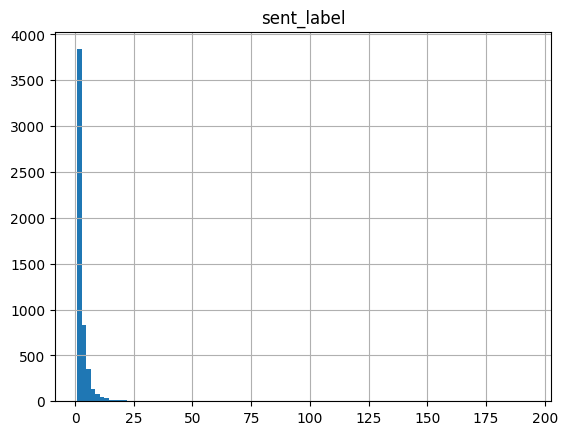

In [21]:
df.groupby('reply_to').agg({'sent_label': 'count'}).hist(bins=100)   

In [22]:
df.groupby('reply_to').agg({'sent_label': 'count'})

,sent_label
reply_to,
517.0,5
1619.0,44
1795.0,2
16974.0,20
17188.0,11
...,...
224902213.0,1
224902317.0,1
224902333.0,1


In [29]:
resample_frequency = 'D'  # Change this to 'T' for minutes, 'S' for seconds, etc.
df_resampled = df.groupby('sent_label').resample(resample_frequency).size().unstack(fill_value=0)
df_sent_labels = df_resampled.T#.reset_index().set_
df_sent_labels.loc[:, 'total'] = df_sent_labels.sum(axis=1)
df_sent_labels.loc[:, 'negative'] = df_sent_labels.negative / df_sent_labels.total    
df_sent_labels.loc[:, 'neutral'] = df_sent_labels.neutral / df_sent_labels.total
df_sent_labels.loc[:, 'positive'] = df_sent_labels.positive / df_sent_labels.total
#df_sent_labels.drop(columns=['total'], inplace=True)
df_sent_labels

/tmp/ipykernel_11479/524164055.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.88235294 0.76923077 0.63636364 0.58791209 0.33333333 0.35185185
 0.58461538 0.47222222 0.54166667 0.47058824 0.5483871  0.5
 0.63636364 0.62711864 0.55357143 0.59090909 0.55555556 0.4375
 0.53846154 0.5        0.60483871 0.58024691 0.67647059 0.59259259
 0.47272727 0.58208955 0.52380952 0.62921348 0.63       0.53125
 0.61904762 0.5        0.65891473 0.59541985 0.74468085 0.5308642
 0.78021978 0.65306122 0.6119403  0.36363636 0.58461538 0.54
 0.71428571 0.48101266 0.69642857 0.475      0.52857143 0.61290323
 0.57142857 0.76119403 0.6969697  0.71052632 0.72108844 0.56666667
 0.4789916  0.54945055 0.575      0.44444444 0.44117647 0.6
 0.4939759  0.78723404 0.61290323 0.59405941 0.45833333 0.46067416
 0.5        0.60606061 0.48       0.66666667 0.64285714 0.68181818
 0.47619048 0.46808511 0.55555556 0.70212766 0.50980392 0.52272727
 0

sent_label,negative,neutral,positive,total
date,,,,
2023-09-15,0.882353,0.058824,0.058824,17
2023-09-16,0.769231,0.230769,0.000000,13
2023-09-17,0.636364,0.363636,0.000000,11
2023-09-18,0.587912,0.307692,0.104396,182
2023-09-19,0.333333,0.481481,0.185185,27
...,...,...,...,...
2024-03-14,0.515000,0.375000,0.110000,200
2024-03-15,0.631579,0.279352,0.089069,247
2024-03-16,0.678571,0.178571,0.142857,84


Text(0, 0.5, 'Total Count')

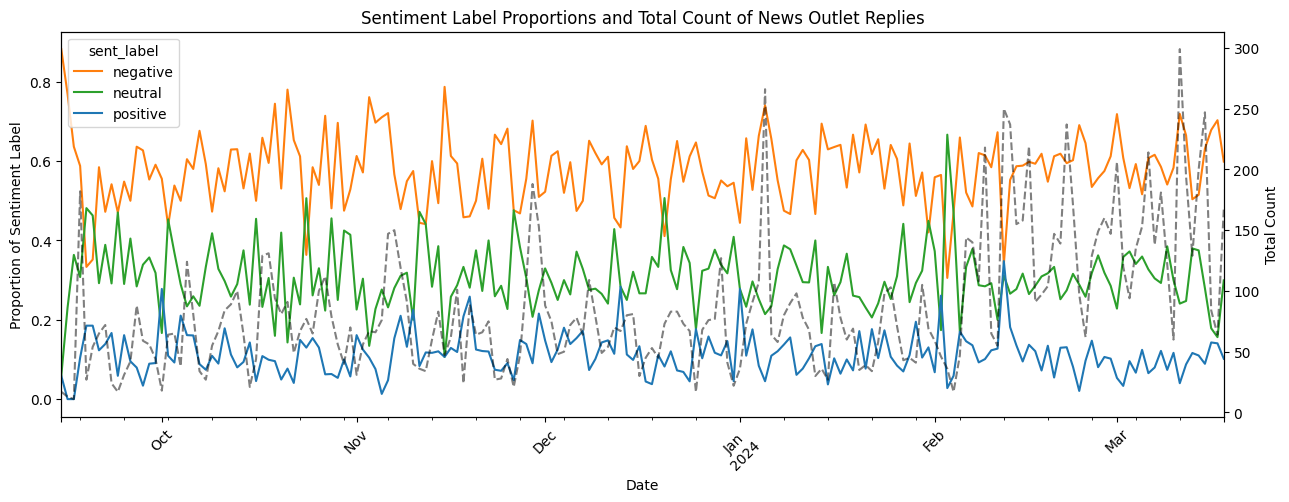

In [31]:


fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot the proportions on the primary y-axis
df_sent_labels.drop(columns='total').plot(ax=ax1, color=[COLOR_NEGATIVE, COLOR_NEUTRAL, COLOR_POSITIVE])
ax1.set_ylabel('Proportion of Sentiment Label')
ax1.set_xlabel('Date')
ax1.set_title('Sentiment Label Proportions and Total Count of News Outlet Replies')
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the total count on the secondary y-axis
df_sent_labels.total.plot(ax=ax2, color='black', linestyle='--', alpha=0.5)
ax2.set_ylabel('Total Count')